In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read the file into Pandas, skip the header rows
datasheet = pd.read_excel('Lindquist-1988.xls', skiprows = 31)

#Get the units of each series (column) stored as a variable for later reference
units = datasheet.iloc[[0]]

#Create a new dataframe called 'data' and drop the units row
data = datasheet.drop(0)

#Set the index column to 'Depth'
data.set_index('Depth')

#View the dataframe
data

,Depth,Permeability,perm_error,Porosity,pore_error,Bedding,Zone,Well
1,13647,0.09,0.0142633,6.6,2.57496,1.0,2.0,1.0
2,13650,0.13,0.0184331,8.8,2.60351,3.0,2.0,1.0
3,13654,0.09,0.0109567,7.4,2.65025,2.0,2.0,1.0
4,13658,1.3,0.0135963,8.2,1.18644,3.0,2.0,1.0
5,13662,0.12,0.0190114,6.8,1.94267,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...
1332,13614,0.02,0.0176934,5.8,2.53129,1.0,3.0,9.0
1333,13633,0.04,0.0172187,6.1,1.53986,3.0,3.0,9.0
1334,13639,0.03,0.0158085,6.7,1.48914,2.0,3.0,9.0
1335,13652,0.08,0.010412,5.4,1.13767,1.0,3.0,9.0


In [3]:
#Test to see that we get the units as we expect
#This shortcut may be helpful later on when we need to remind ourselves of the units
units

,Depth,Permeability,perm_error,Porosity,pore_error,Bedding,Zone,Well
0,feet,millidarcies,milidarcies,percent,percent,NaN,NaN,NaN


In [4]:
#Group the data into specific wells
well_1 = data[data['Well'] == 1.0]
well_2 = data[data['Well'] == 2.0]
well_3 = data[data['Well'] == 3.0]
well_4 = data[data['Well'] == 4.0]
well_5 = data[data['Well'] == 5.0]
well_6 = data[data['Well'] == 6.0]
well_7 = data[data['Well'] == 7.0]
well_8 = data[data['Well'] == 8.0]
well_9 = data[data['Well'] == 9.0]

#I'm going to put these dataframes into a list so that I can expedite things later on
well_groups = [well_1, well_2, well_3, well_4, well_5, well_6, well_7, well_8, well_9]

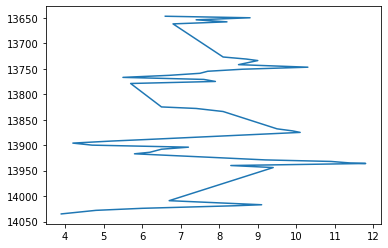

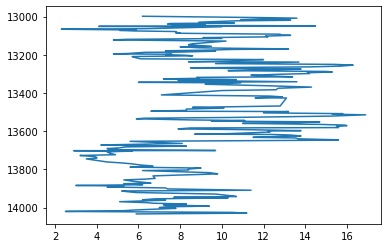

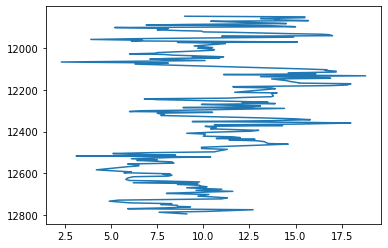

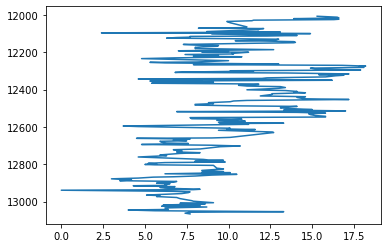

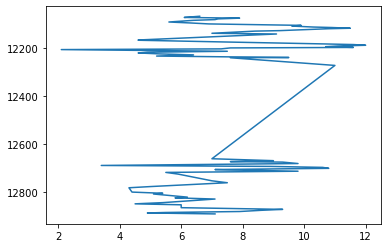

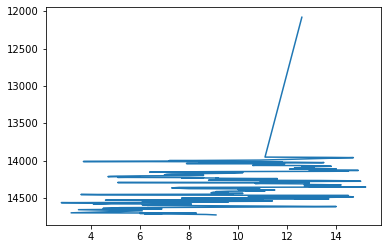

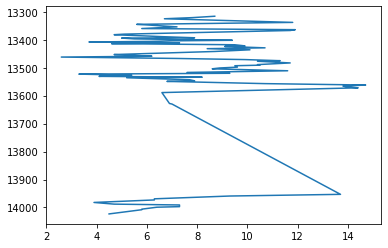

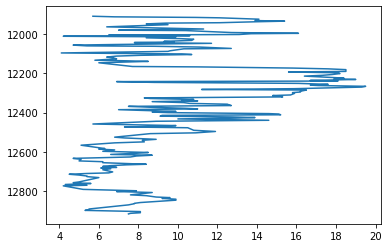

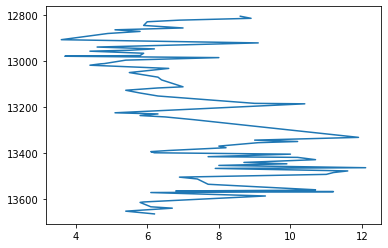

<Figure size 432x288 with 0 Axes>

In [5]:
#Using a for loop, I can iterate through my list of dataframes and make all the plots for each well quickly
for df in well_groups:
    plot(df['Porosity'], df['Depth'])
    gca().invert_yaxis()
    figure()

In [6]:
#It makes sense to group the data by ranges of depths to better identify the abrupt changes in permeability/porosity
#We can do that using boolean indexing. To have two conditions, we need the '&' symbol for 'and'
#We're not using 'or' conditions, but that symbol is '|'
#'and' means both conditions must be met, 'or' means only one condition must be met
#and = & // or = |
data_12000 = data[(data['Depth'] < 12000)]
data_13000 = data[(data['Depth'] < 13000) & (data['Depth'] >= 12000)]
data_14000 = data[(data['Depth'] < 14000) & (data['Depth'] >= 13000)]
data_15000 = data[(data['Depth'] >= 14000)]

depth_groups = [data_12000, data_13000, data_14000, data_15000]

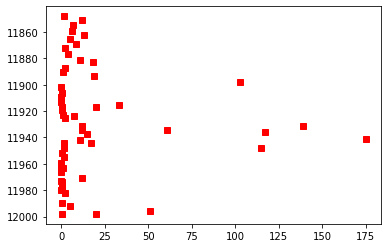

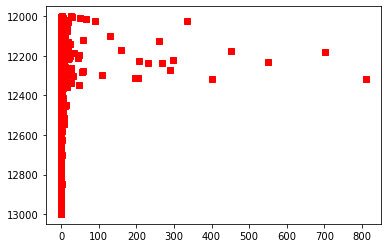

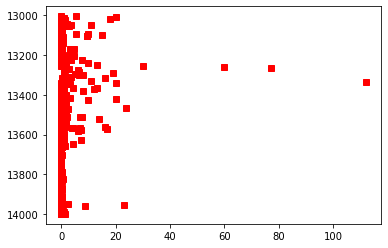

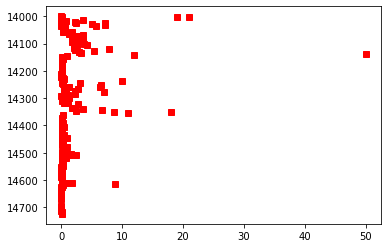

<Figure size 432x288 with 0 Axes>

In [7]:
#Let's make those same plots again, but this time grouped by depths
for df in depth_groups:
    plot(df['Permeability'], df['Depth'], 'rs')
    gca().invert_yaxis()
    figure()

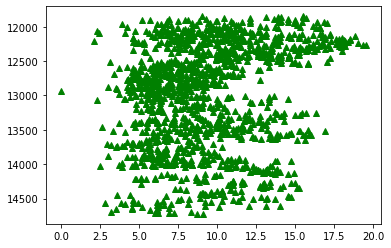

In [8]:
#It seems like we have abrupt changes in permeability at 11950', 12200', 13250', 14100', and 14350'
plot(data['Porosity'], data['Depth'], 'g^')
gca().invert_yaxis()

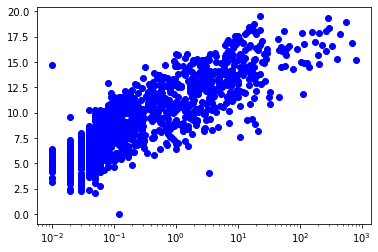

In [9]:
semilogx(data['Permeability'], data['Porosity'], 'bo')

In [10]:
maxDepth = data['Depth'].max()
minDepth = data['Depth'].min()
print(minDepth, maxDepth)

11848 14724


In [11]:
zone_1 = data[data['Zone'] == 1]
zone_2 = data[data['Zone'] == 2]
zone_3 = data[data['Zone'] == 3]

zone_groups = [zone_1, zone_2, zone_3]

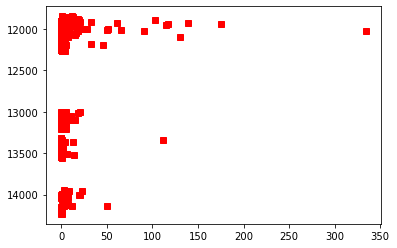

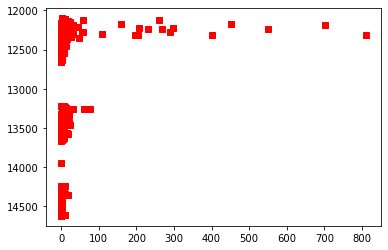

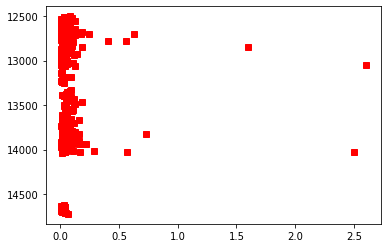

<Figure size 432x288 with 0 Axes>

In [12]:
for df in zone_groups:
    plot(df['Permeability'], df['Depth'], 'rs')
    gca().invert_yaxis()
    figure()

In [13]:
bedding_1 = data[data['Bedding'] == 1]
bedding_2 = data[data['Bedding'] == 2]
bedding_3 = data[data['Bedding'] == 3]
bedding_4 = data[data['Bedding'] == 4]
bedding_5 = data[data['Bedding'] == 5]
bedding_6 = data[data['Bedding'] == 6]
bedding_7 = data[data['Bedding'] == 7]
bedding_8 = data[data['Bedding'] == 8]
bedding_9 = data[data['Bedding'] == 9]

bedding_groups = [bedding_1, bedding_2, bedding_3, bedding_4, bedding_5, bedding_6, bedding_7, bedding_8, bedding_9]

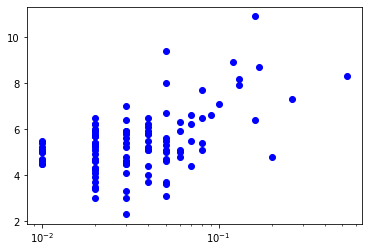

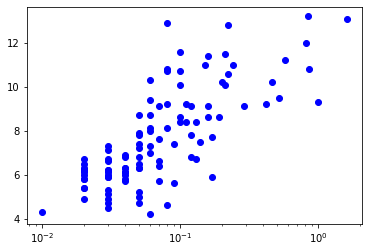

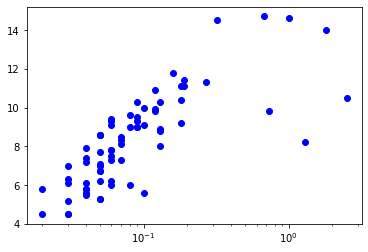

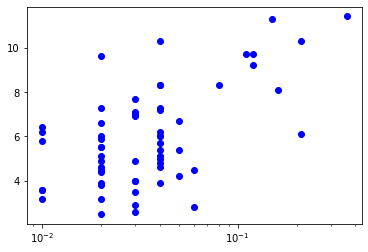

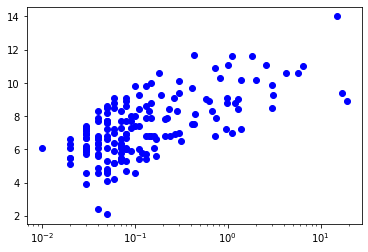

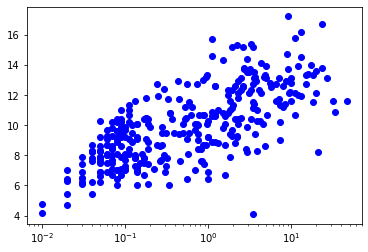

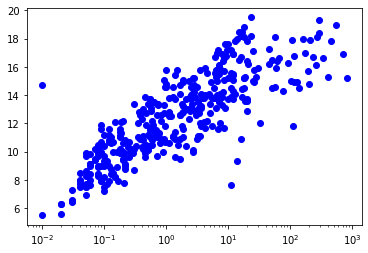

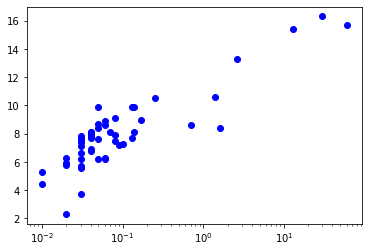

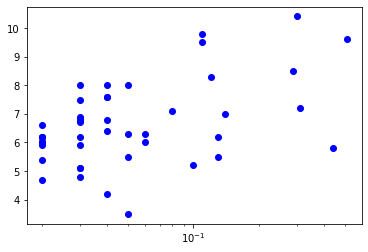

<Figure size 432x288 with 0 Axes>

In [14]:
for df in bedding_groups:
    semilogx(df['Permeability'], df['Porosity'], 'bo')
    figure()

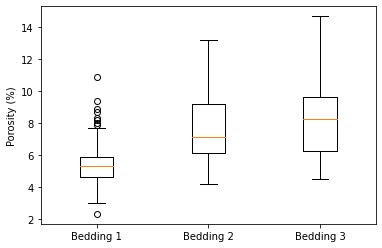

In [15]:

#We could make boxplots for porosity values this way...
boxplot([bedding_1['Porosity'].values, bedding_2['Porosity'].values, bedding_3['Porosity'].values], labels=['Bedding 1', 'Bedding 2', 'Bedding 3'])
ylabel('Porosity (%)');
#But I'm lazy, and I don't want to type all that stuff out, scroll down for a more efficient solution

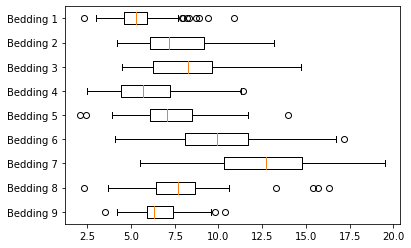

In [16]:
beddingNames = ['Bedding 1', 'Bedding 2', 'Bedding 3', 'Bedding 4', 'Bedding 5', 'Bedding 6', 'Bedding 7', 'Bedding 8', 'Bedding 9']

#This is a quicker way to make all those boxplots
#I think it looks better if they're arranged vertically
boxplot([x['Porosity'].values for x in bedding_groups], labels = beddingNames, vert = False)
gca().invert_yaxis();
#xticks(rotation = 45, ha = 'right');

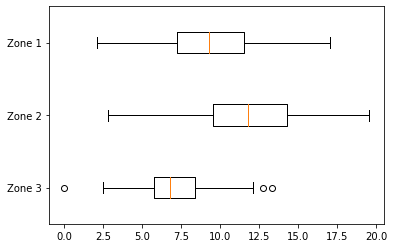

In [17]:
boxplot([x['Porosity'].values for x in zone_groups], labels = ['Zone 1', 'Zone 2', 'Zone 3'], vert = False)
gca().invert_yaxis();

In [18]:
print(data['Depth'].min(), data['Depth'].max())

11848 14724


In [19]:
(14724-11848)/50

57.52

In [20]:
meanList = []
depthList = []
depthMin = 11848
for i in range(1, 59):
    depthMax = depthMin + 50
    d = data[(data['Depth'] >= depthMin) & (data['Depth'] < depthMax)]
    meanList.append(d['Porosity'].mean())
    depthList.append((depthMax + depthMin) / 2)
    depthMin = depthMax

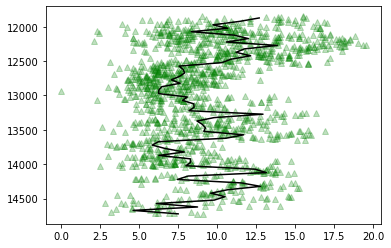

In [21]:
#Average values of 50 foot groups
plot(data['Porosity'], data['Depth'], 'g^', alpha = 0.25)
plot(meanList, depthList, 'k')
gca().invert_yaxis();

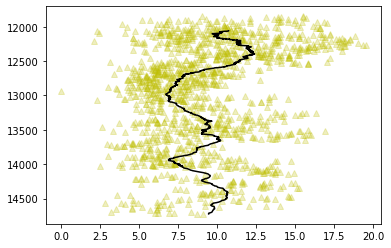

In [22]:
#Rolling average plot
data = data.sort_values('Depth')
plot(data['Porosity'], data['Depth'], 'y^', alpha = 0.25)
rolling_mean = data.Porosity.rolling(window = 100).mean()
plot(rolling_mean, data['Depth'], 'k')
gca().invert_yaxis();

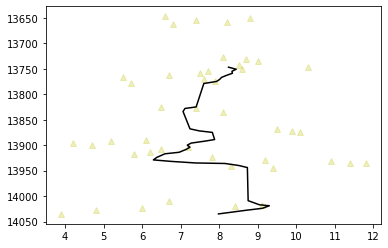

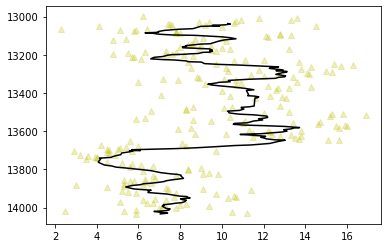

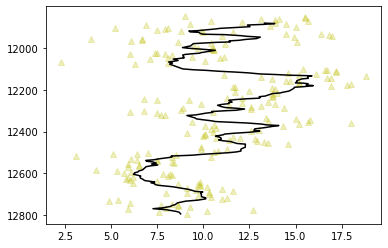

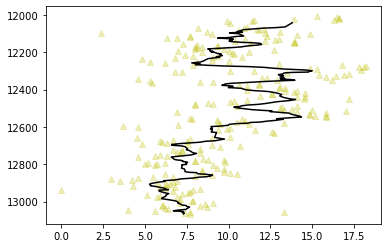

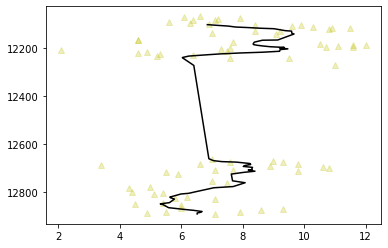

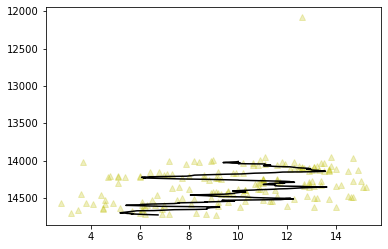

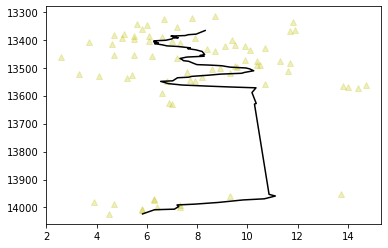

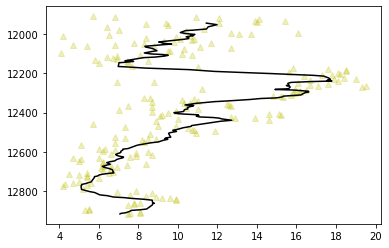

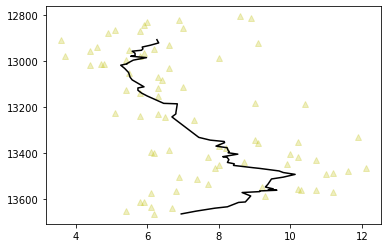

<Figure size 432x288 with 0 Axes>

In [23]:
for df in well_groups:
    df = df.sort_values('Depth')
    plot(df['Porosity'], df['Depth'], 'y^', alpha = 0.25)
    rolling_mean = df.Porosity.rolling(window = 10).mean()
    plot(rolling_mean, df['Depth'], 'k')
    gca().invert_yaxis()
    figure();

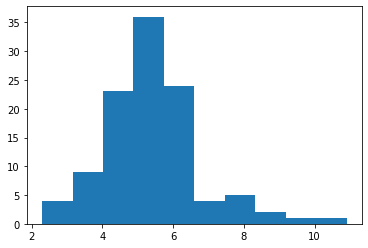

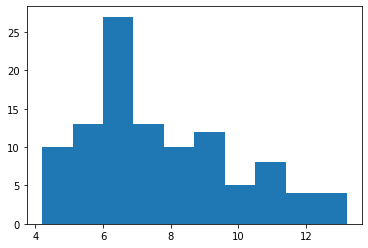

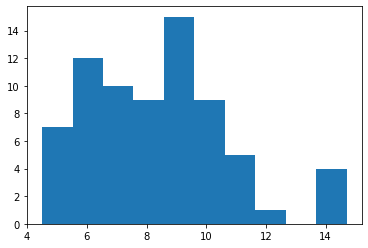

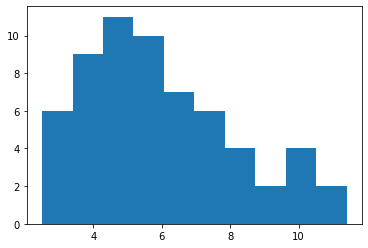

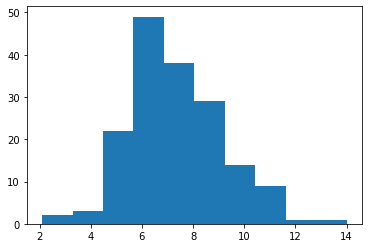

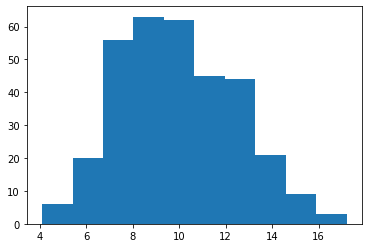

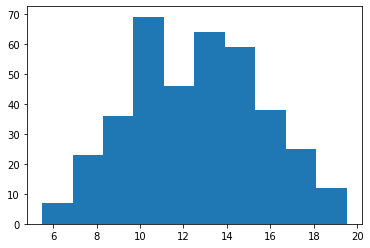

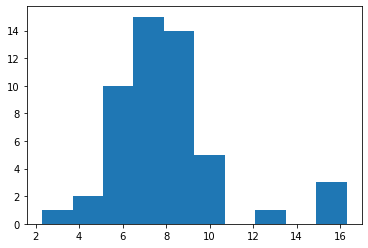

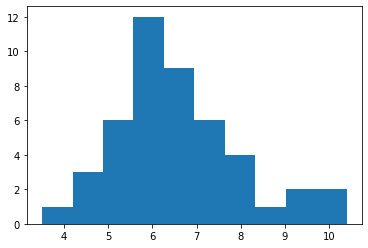

<Figure size 432x288 with 0 Axes>

In [24]:
for df in bedding_groups:
    hist(df['Porosity'], bins = 10)
    figure()

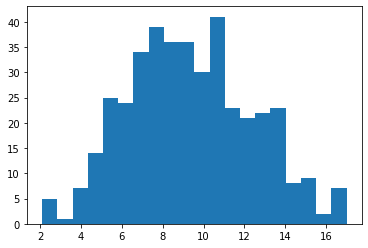

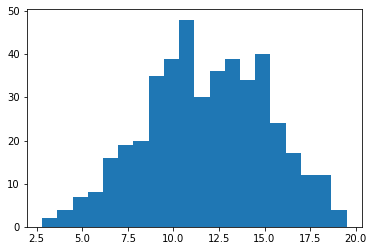

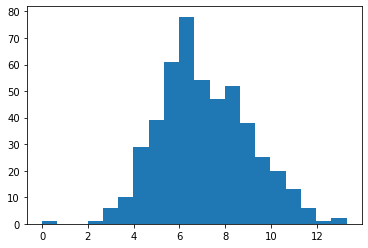

<Figure size 432x288 with 0 Axes>

In [25]:
for df in zone_groups:
    hist(df['Porosity'], bins = 20)
    figure()

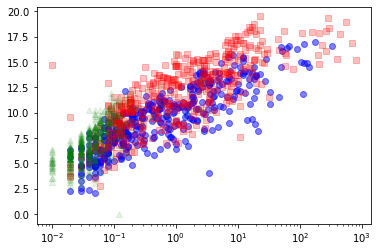

In [28]:
zone_1 = data[data['Zone'] == 1]
zone_2 = data[data['Zone'] == 2]
zone_3 = data[data['Zone'] == 3]

zone_groups = [zone_1, zone_2, zone_3]

semilogx(zone_1['Permeability'], zone_1['Porosity'], 'bo', alpha = 0.5)
semilogx(zone_2['Permeability'], zone_2['Porosity'], 'rs', alpha = 0.25)
semilogx(zone_3['Permeability'], zone_3['Porosity'], 'g^', alpha = 0.1)